**Importing Base libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Loading Data**

In [2]:
from pandas import datetime

def parser(time):
    return datetime.strptime(time, '%d-%m-%Y')

wallmart_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataScience_Assessments/Retail_wallmart_analysis/Walmart_Store_sales.csv', parse_dates=[1], date_parser = parser)
wallmart_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  after removing the cwd from sys.path.


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


**Adding holiday column**

In [0]:
def addHoliday(date):
  if ((pd.to_datetime(date) == pd.to_datetime(pd.Series(['12-02-10', '11-02-11', '10-02-12', '08-02-13']))).any()) :
    return 'Super Bowl'
  elif ( (pd.to_datetime(date) == pd.to_datetime(pd.Series(['10-09-10', '09-09-11', '07-09-12', '06-09-13']))).any()):
    return 'Labour Day'
  elif ((pd.to_datetime(date) == pd.to_datetime(pd.Series(['26-11-10', '25-11-11', '23-11-12', '29-11-13']))).any()):
    return 'Thanksgiving'
  elif ( (pd.to_datetime(date) == pd.to_datetime(pd.Series(['31-12-10', '30-12-11', '28-12-12', '27-12-13']))).any()):
    return 'Christmas'
  else:
    return 'Non holiday'
   

In [0]:
wallmart_data['holiday'] = wallmart_data['Date'].apply(addHoliday)

In [0]:
wallmart_data.sort_values(by='Date', ignore_index=True, inplace=True)

In [6]:
wallmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   holiday       6435 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 452.6+ KB


There are 8 columns and 6435 entries and  no missing data. 

### 1. Which store has maximum sales

---



In [0]:
gb_store = wallmart_data.groupby('Store')

In [8]:
gb_store.sum().iloc[gb_store.sum()['Weekly_Sales'].argmax()]

Weekly_Sales    3.013978e+08
Holiday_Flag    1.000000e+01
Temperature     7.929550e+03
Fuel_Price      4.887180e+02
CPI             2.989245e+04
Unemployment    1.054112e+03
Name: 20, dtype: float64

In [9]:
gb_store.Weekly_Sales.sum().max()

301397792.46000004

Store 20 has maximum sales, and maximum sales value is **301397792.46000004**

In [10]:
gb_store.sum().iloc[gb_store.sum()['Weekly_Sales'].argmin()]

Weekly_Sales    3.716022e+07
Holiday_Flag    1.000000e+01
Temperature     1.097213e+04
Fuel_Price      5.113570e+02
CPI             1.840119e+04
Unemployment    1.220241e+03
Name: 33, dtype: float64

In [11]:
gb_store.Weekly_Sales.sum().min()

37160221.960000016

Store 33 has minimum sales, and minimum sales value is 37160221.960000016

### 2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation


---



In [12]:
gb_store.Weekly_Sales.std().max()

317569.9494755081

In [13]:
gb_store.std().iloc[gb_store.std()['Weekly_Sales'].argmax()]

Weekly_Sales    317569.949476
Holiday_Flag         0.255926
Temperature         16.271612
Fuel_Price           0.443029
CPI                  3.594820
Unemployment         0.151460
Name: 14, dtype: float64

Store 14 has max standard deviation and the value is **317569.9494755081**


### 3. Which store/s has good quarterly growth rate in Q3’2012
---



In [0]:
#@title
wallmart_data['Date'] = wallmart_data['Date'].astype('datetime64[ns]')

In [0]:
#@title
def getQ32012(date):
  quarter = pd.to_datetime(date).quarter
  year = pd.to_datetime(date).year
  if(quarter==3 and year==2012):
    return True
  return False

In [0]:
#@title
gb_store_q32012 = wallmart_data[wallmart_data.Date.apply(getQ32012)].groupby('Store')

In [17]:
#@title
gb_store_q32012.sum()['Weekly_Sales'].max()

27796792.46

In [18]:
#@title
gb_store_q32012.sum().iloc[gb_store_q32012.sum()['Weekly_Sales'].argmax()]

Weekly_Sales    2.779679e+07
Holiday_Flag    1.000000e+00
Temperature     1.009140e+03
Fuel_Price      4.549000e+01
CPI             1.700796e+03
Unemployment    5.300100e+01
Name: 4, dtype: float64

Store 4 has Maximum sales in quarter 3 of 2012, and the value is **25652119.35**

### 4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

---



In [19]:
wallmart_data['holiday'].value_counts()

Non holiday     6210
Christmas         90
Thanksgiving      90
Labour Day        45
Name: holiday, dtype: int64

In [0]:
mean_nonholiday = wallmart_data[wallmart_data['holiday'] == 'Non holiday']['Weekly_Sales'].mean()

In [0]:
gb_holiday = wallmart_data.groupby('holiday')

In [22]:
gb_holiday.Weekly_Sales.mean()

holiday
Christmas       9.608331e+05
Labour Day      1.039183e+06
Non holiday     1.042120e+06
Thanksgiving    1.471273e+06
Name: Weekly_Sales, dtype: float64

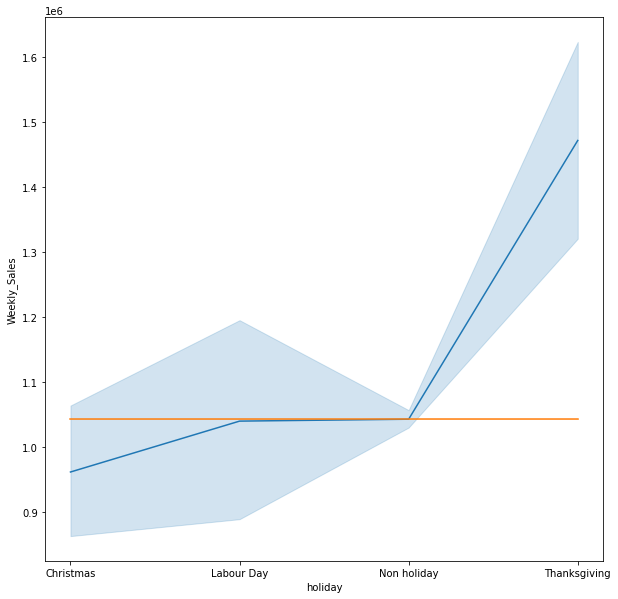

In [23]:
plt.figure(figsize=(10, 10))
sns.lineplot( data=wallmart_data, y='Weekly_Sales', x=wallmart_data['holiday'])
sns.lineplot( data=wallmart_data, y=mean_nonholiday, x=wallmart_data['holiday'])

**Cristamas** holiday having **Negative impact** on Sales

### 5. Provide a monthly and semester view of sales in units and give insights

---



In [0]:
 wallmart_data['months'] = pd.to_datetime(wallmart_data['Date']).dt.strftime('%Y-%m')

In [25]:
wallmart_data.groupby('months').sum()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
months,,,,,,,
2010-02,4140,1.903330e+08,45,6531.84,484.554,30210.202611,1551.476
2010-03,4140,1.819198e+08,0,8494.99,501.607,30227.552288,1551.476
2010-04,5175,2.314124e+08,0,12802.81,645.421,37727.648220,1911.985
2010-05,4140,1.867109e+08,0,11765.59,525.123,30175.516368,1529.588
2010-06,4140,1.922462e+08,0,13513.78,501.841,30240.843812,1529.588
2010-07,5175,2.325801e+08,0,17853.19,624.149,37800.367400,1896.430
2010-08,4140,1.876401e+08,0,14205.55,500.940,30278.139478,1517.144
2010-09,4140,1.772679e+08,45,13104.24,492.213,30285.904384,1517.144
2010-10,5175,2.171618e+08,0,13986.43,631.638,37902.074930,1906.940


In [0]:
def add_semester_column(quarter):
  if quarter <=2:
    return 1
  return 2

In [0]:
wallmart_data['semister'] = pd.to_datetime(wallmart_data['Date'], format='%Y-%m-%d').dt.quarter.apply(add_semester_column)

In [28]:
wallmart_data.groupby(['semister', 'months']).sum()

Store  Weekly_Sales  ...           CPI  Unemployment
semister months                        ...                            
1        2010-02   4140  1.903330e+08  ...  30210.202611      1551.476
         2010-03   4140  1.819198e+08  ...  30227.552288      1551.476
         2010-04   5175  2.314124e+08  ...  37727.648220      1911.985
         2010-05   4140  1.867109e+08  ...  30175.516368      1529.588
         2010-06   4140  1.922462e+08  ...  30240.843812      1529.588
         2011-01   4140  1.637040e+08  ...  30382.527235      1492.416
         2011-02   4140  1.863313e+08  ...  30526.206281      1492.416
         2011-03   4140  1.793564e+08  ...  30658.299773      1492.416
         2011-04   5175  2.265265e+08  ...  38475.181060      1833.780
         2011-05   4140  1.816482e+08  ...  30847.859305      1467.024
         2011-06   4140  1.897734e+08  ...  30820.821097      1467.024
         2012-01   4140  1.688945e+08  ...  31368.178118      1351.500
         2012-02   4140  1.920636e+08  ...  31431.302831      1351.500
         2012-03   5175  2.315097e+08  ...  39406.847572      1689.375
         2012-04   4140  1.889209e+08  ...  31589.395697      1335.516
         2012-05   4140  1.887665e+08  ...  31610.778941      1335.516
         2012-06   5175  2.406103e+08  ...  39510.849348      1669.395
2        2010-07   5175  2.325801e+08  ...  37800.367400      1896.430
         2010-08   4140  1.876401e+08  ...  30278.139478      1517.144
         2010-09   4140  1.772679e+08  ...  30285.904384      1517.144
         2010-10   5175  2.171618e+08  ...  37902.074930      1906.940
         2010-11   4140  2.028534e+08  ...  30348.262745      1525.552
         2010-12   5175  2.887605e+08  ...  37903.335831      1906.940
         2011-07   5175  2.299114e+08  ...  38603.820411      1821.935
         2011-08   4140  1.885993e+08  ...  30941.069948      1457.548
         2011-09   5175  2.208477e+08  ...  38757.204172      1821.935
         2011-10   4140  1.832613e+08  ...  31123.737582      1404.760
         2011-11   4140  2.101624e+08  ...  31186.531672      1404.760
         2011-12   5175  2.880781e+08  ...  39093.716850      1755.950
         2012-07   4140  1.875095e+08  ...  31620.093064      1302.720
         2012-08   5175  2.368508e+08  ...  39549.392800      1628.400
         2012-09   4140  1.806455e+08  ...  31713.337811      1302.720
         2012-10   4140  1.843617e+08  ...  31789.964783      1251.668

[33 rows x 7 columns]

In [29]:
wallmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,holiday,months,semister
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,Non holiday,2010-02,1
1,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765,Non holiday,2010-02,1
2,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554,Non holiday,2010-02,1
3,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548,Non holiday,2010-02,1
4,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324,Non holiday,2010-02,1


In [0]:
corr_data = wallmart_data.corr()

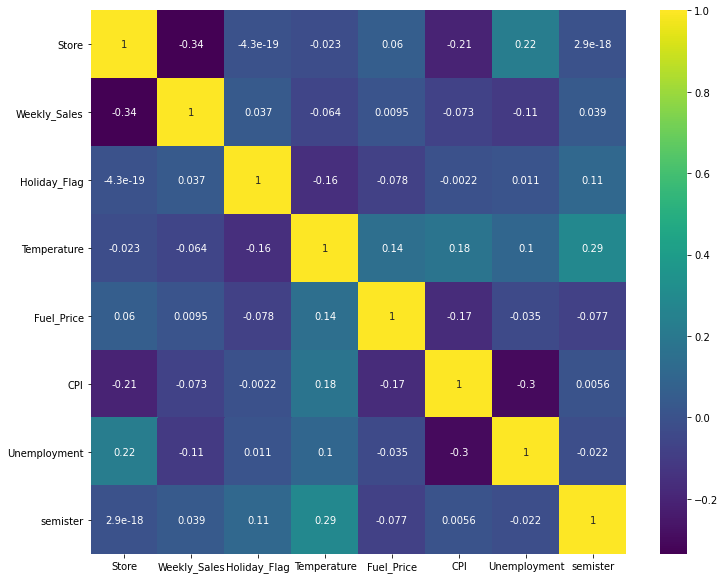

In [31]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_data, annot=True, cmap='viridis')

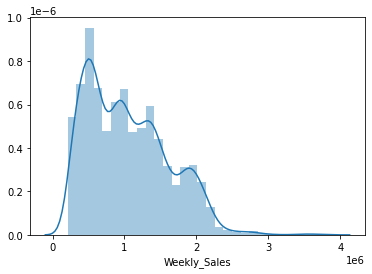

In [32]:
sns.distplot(wallmart_data['Weekly_Sales'], bins=30)

### 6. For Store 1 – Build prediction models to forecast demand

---



In [0]:
data_store1 = wallmart_data[wallmart_data['Store']==1].loc[:,['Date', 'Weekly_Sales']]

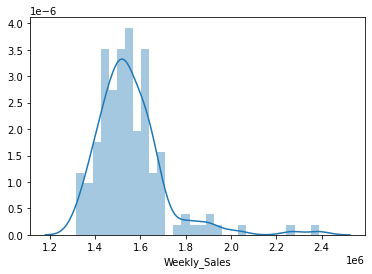

In [34]:
sns.distplot(data_store1['Weekly_Sales'], bins=30)

In [35]:
data_store1.head()

,Date,Weekly_Sales
0,2010-02-05,1643690.90
59,2010-02-12,1641957.44
116,2010-02-19,1611968.17
174,2010-02-26,1409727.59
182,2010-03-05,1554806.68


In [0]:
#data_store1['Date'] = pd.to_datetime(data_store1['Date'])

In [0]:
modified_data_store1 = data_store1['Weekly_Sales'].diff(periods=1)
modified_data_store1.index = data_store1['Date']
modified_data_store1.dropna(inplace=True)

In [38]:
modified_data_store1

Date
2010-02-12     -1733.46
2010-02-19    -29989.27
2010-02-26   -202240.58
2010-03-05    145079.09
2010-03-12   -115265.09
                ...    
2012-09-28    -69066.80
2012-10-05    233726.71
2012-10-12    -97713.16
2012-10-19    -65004.04
2012-10-26    -14409.03
Name: Weekly_Sales, Length: 142, dtype: float64

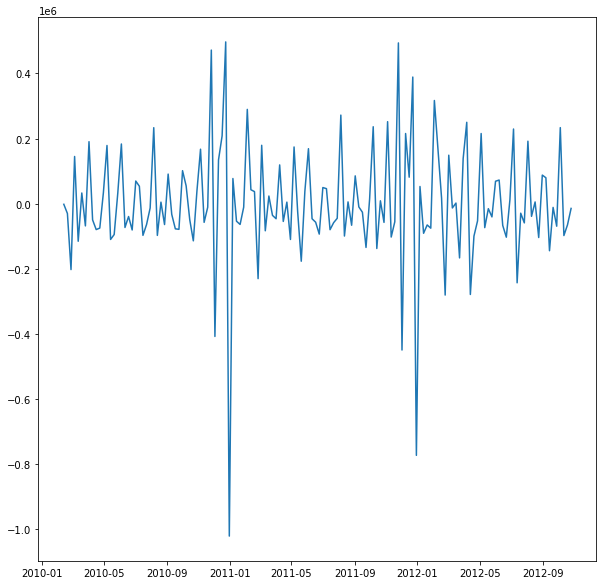

In [39]:
plt.figure(figsize=(10, 10))
plt.plot(modified_data_store1)

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [41]:
model_tsa = ARIMA(modified_data_store1, order=(1, 1, 1))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


In [0]:
final_model_tsa = model_tsa.fit()

In [0]:
predictions_arima = final_model_tsa.forecast(steps=50)[0]

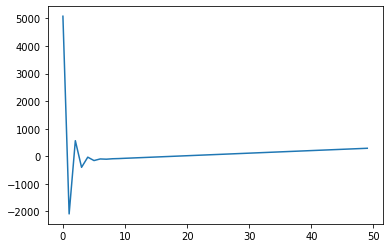

In [44]:
plt.plot(predictions_arima)


### 7. Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [0]:
wallmart_data['structuredDate'] = pd.Series((wallmart_data['Date'] - wallmart_data['Date'][0]) + pd.Timedelta('1 days')).astype('timedelta64[D]')

In [46]:
wallmart_data['structuredDate'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: structuredDate, dtype: float64

In [0]:
features = wallmart_data.drop(['Weekly_Sales', 'Date', 'holiday', 'months'], axis=1)
y = wallmart_data.loc[:,'Weekly_Sales'].values

In [0]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression

In [0]:
test = SelectKBest(score_func=f_regression, k=4)
fit = test.fit(features.values, y)

In [0]:
feature_score = pd.DataFrame(fit.pvalues_ < 0.05, columns=['Selected'], index=features.columns)
feature_score['score'] = fit.scores_
feature_score['P'] = fit.pvalues_
feature_score['P'] = feature_score['P'].round(5)

In [51]:
feature_score

,Selected,score,P
Store,True,815.022439,0.00000
Holiday_Flag,True,8.766881,0.00308
Temperature,True,26.300448,0.00000
Fuel_Price,False,0.576212,0.44783
CPI,True,34.118717,0.00000
Unemployment,True,73.348421,0.00000
semister,True,9.974309,0.00159
structuredDate,False,0.310688,0.57728


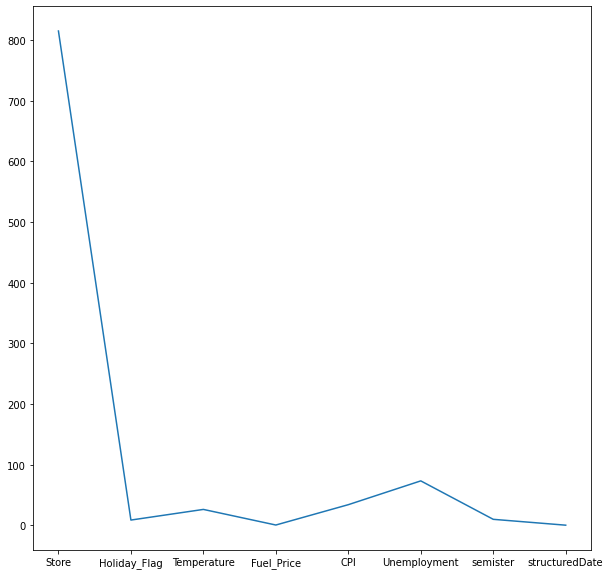

In [52]:
plt.figure(figsize=(10, 10))
plt.plot(feature_score['score'])

**UnEmployment, CPI have impact on sales and Fuel_Price has no impact on sales**

In [0]:
features.drop(['Fuel_Price', 'structuredDate'], axis=1, inplace=True)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(features, y, random_state=101, test_size=0.3) 

In [0]:
from sklearn.linear_model import  LinearRegression

In [57]:
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predictions_lr = model_lr.predict(X_test)

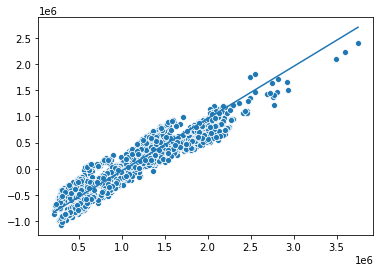

In [59]:
sns.scatterplot(x=Y_test, y=Y_test-predictions_lr)
sns.lineplot(x=Y_test, y=(Y_test - Y_test.mean()) )

### 8. Change dates into days by creating new variable.

In [0]:
features['days'] = pd.to_datetime(wallmart_data['Date'], format='%Y-%m-%d').dt.day

In [61]:
features['days']

0        5
1        5
2        5
3        5
4        5
        ..
6430    26
6431    26
6432    26
6433    26
6434    26
Name: days, Length: 6435, dtype: int64

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(features, y, random_state=101, test_size=0.3) 

In [63]:
model_lr1 = LinearRegression()
model_lr1.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predictions_lr1 = model_lr1.predict(X_test)

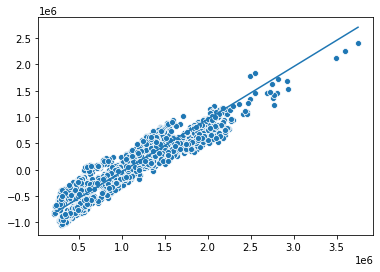

In [65]:
sns.scatterplot(x=Y_test, y=Y_test-predictions_lr1)
sns.lineplot(x=Y_test, y=(Y_test - Y_test.mean()) )